## Observations and Insights 

In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
merged_data = mouse_metadata.merge(study_results,on=["Mouse ID"])




# Display the data table for preview
merged_data.head(50)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
len(merged_data["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate. mice by ID number that shows up for Mouse ID and Timepoint. 
merged_data.duplicated(subset=None, keep='first')
duplicates = pd.DataFrame(merged_data, columns=['Mouse ID', 'Timepoint'])
dup_df = duplicates[duplicates.duplicated(['Mouse ID', 'Timepoint'])]
dup_df


,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [4]:
cleandata = merged_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
len(cleandata["Mouse ID"].unique())

249

In [5]:
cleandata.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary Statistics

In [6]:
tvolume = cleandata["Tumor Volume (mm3)"]
mean = cleandata.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

median = cleandata.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

variance = cleandata.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

stdev = cleandata.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

SEM = cleandata.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_table = pd.DataFrame({"Mean": mean, "Median":median, "Variance":variance, "Standard Deviation": stdev, "SEM": SEM})

summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Mice')

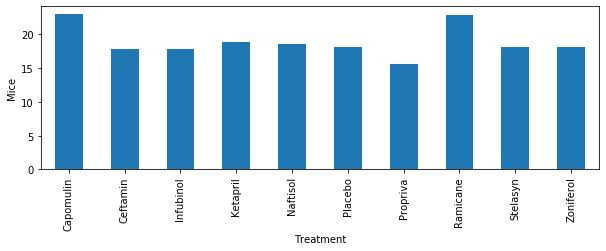

In [7]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_index = cleandata.set_index("Drug Regimen")
drug_df = drug_index.groupby(["Drug Regimen"])

mouse_df = drug_df["Mouse ID"]
mouse_count = (drug_df["Mouse ID"].count())/10

pandaplot = mouse_count.plot(kind="bar", figsize = (10,3))

pandaplot.set_xlabel("Treatment")
pandaplot.set_ylabel("Mice")


In [8]:
treatment_type = cleandata["Drug Regimen"].unique()
treatment_type

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

Text(0, 0.5, 'Number of Mice')

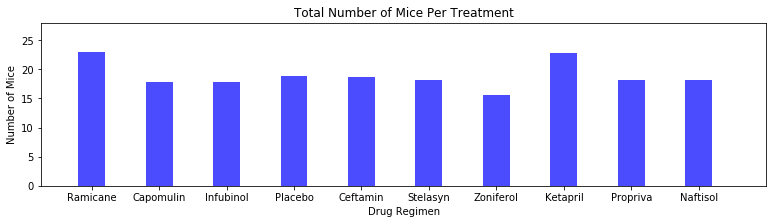

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



x_axis = np.arange(len(mouse_count))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(13,3))
plt.bar(x_axis, mouse_count, color='b', alpha=.7, align="center", width=0.4)
plt.xticks(tick_locations, treatment_type, rotation=0)

plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(mouse_count)+5)

plt.title("Total Number of Mice Per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

In [13]:
gender_count

,Gender Distribution
Sex,
Female,124
Male,125


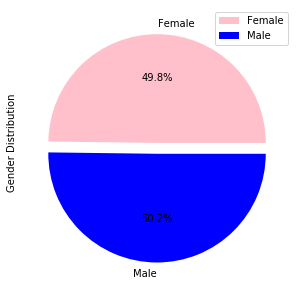

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_gender = cleandata.groupby(['Mouse ID','Sex'])

gender_df = pd.DataFrame(mouse_gender.size())
 
gender_count = pd.DataFrame(gender_df.groupby(["Sex"]).count())
gender_count.columns = ["Gender Distribution"]

colors = ['Pink', 'Blue']
plot = gender_count.plot.pie(y='Gender Distribution', autopct='%1.1f%%',explode=(0,0.1), figsize = (5,5), colors = colors)

([<matplotlib.patches.Wedge at 0x7fc684155c50>,
 [Text(-0.7655308193487089, -0.9241009493704108, 'Male'),
  Text(0.7017365844029833, 0.8470925369228766, 'Female')],
 [Text(-0.44655964462008013, -0.5390588871327395, '50.2%'),
  Text(0.38276540967435446, 0.4620504746852053, '49.8%')])

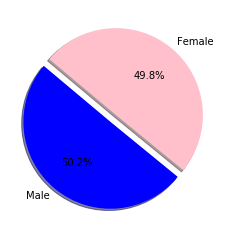

In [18]:
labels = ['Male', 'Female']
sizes = [125,124]
colors = ['Blue', 'Pink']
explode = (0.1,0)

matplot = plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 140)

matplot

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

#Group data by Drug Regimen and Mouse ID to capture Last Tumor Measurement
grouped_drugs = cleandata.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
grouped_drugs 




In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
